## This code analyzes flood event data sheet "FloodEvent_metrics_updated_4.xlsx" that explictly considers pluvial element in the compound driver cases, and therefore including more driver types than the other script without "_v4" in the script and input file name

In [75]:

font_size_title = 12  # Adjust the title font size here
font_size_label = 10  # Adjust the label font size here
font_size_ticks = 10  # Adjust the tick font size here

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data from the Excel file
mainpath = 'C:\\Users\\sunn067\\OneDrive - PNNL\\iCoM\\manuscripts\\paper 4 Long-term Flooding\\'
file_path = mainpath + 'Table\\FloodEvent_metrics_updated_5.xlsx'
flood_data = pd.read_excel(file_path)

# Count frequency of each driver for total and top events
driver_counts = flood_data['Driver'].value_counts()
top_events = flood_data.sort_values(by='percent_inundation_015', ascending=False).head(70)
top_driver_counts = top_events['Driver'].value_counts()

# Combine into a DataFrame
combined_data = pd.DataFrame({
    'Total Events': driver_counts,
    'Top 70 Events': top_driver_counts
})
combined_data.fillna(0, inplace=True)
combined_data['Percentage of Top 70'] = (combined_data['Top 70 Events'] / combined_data['Total Events']) * 100
combined_data['Percentage of All events'] = combined_data['Total Events'] / 241 * 100
# Order the data by total events in ascending order
ordered_data = combined_data.sort_values(by='Total Events')


In [77]:
top_events.to_excel('C:\\Users\\sunn067\\Desktop\\top_70events.xlsx', index=False)

In [78]:
print(ordered_data)

                 Total Events  Top 70 Events  Percentage of Top 70  \
Driver                                                               
Coastal+Pluvial             1            1.0            100.000000   
V2+Pluvial                  1            1.0            100.000000   
V2+Coastal                  2            2.0            100.000000   
ALL                         3            3.0            100.000000   
V3+Coastal                  3            1.0             33.333333   
V2+V3+Pluvial               6            6.0            100.000000   
Pluvial                    10           10.0            100.000000   
Others                     17            0.0              0.000000   
V2+V3+Coastal              25           17.0             68.000000   
Coastal                    31            5.0             16.129032   
V2                         35            4.0             11.428571   
V2+V3                      45           13.0             28.888889   
V3                  

In [79]:
print(ordered_data['Percentage of All events'])

Driver
Coastal+Pluvial     0.414938
V2+Pluvial          0.414938
V2+Coastal          0.829876
ALL                 1.244813
V3+Coastal          1.244813
V2+V3+Pluvial       2.489627
Pluvial             4.149378
Others              7.053942
V2+V3+Coastal      10.373444
Coastal            12.863071
V2                 14.522822
V2+V3              18.672199
V3                 25.726141
Name: Percentage of All events, dtype: float64


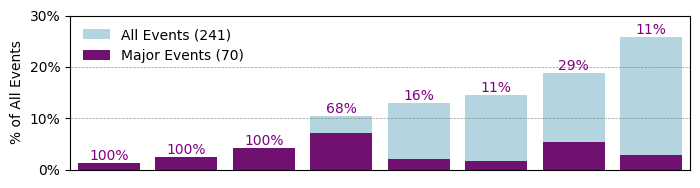

<Figure size 640x480 with 0 Axes>

In [80]:
# Set up the plot
plt.style.use('default')
fig, ax = plt.subplots(figsize=(8, 2))

ordered_data = ordered_data[(ordered_data['Total Events'] >= 3) & (ordered_data['Top 70 Events'] > 2)]

bar_total = sns.barplot(x=ordered_data.index, y=ordered_data['Total Events'], color='lightblue', label='All Events (241)')

# Overlay top 105 events
bar_top = sns.barplot(x=ordered_data.index, y=ordered_data['Top 70 Events'], color='purple', label='Major Events (70)')

# Add percentage labels on each bar
for p, value in zip(bar_top.patches, ordered_data['Percentage of Top 70']):
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{value:.0f}%', ha='center', va='bottom', fontsize=10, color='purple')

# Adding labels and title
#ax.set_title('Comparison of Total Flood Events and Top 105 Events by Driver (Ordered)')
ax.set_ylabel('% of All Events',fontsize=10)
ax.set_ylim([0, 72])
ax.set_yticks([0, 24, 48, 72])  # Specify the tick positions
ax.set_yticklabels(['0%', '10%', '20%', '30%'])  # Optionally set the labels if needed, here they are the same as the positions

#ax.set_xlabel('Driver')
plt.legend(fontsize = 10, frameon=False, )
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha = 0.8)
ax.set_xticks([])  # Remove x-ticks from the upper plot
ax.set_xlabel('')

# Show the plot
plt.show()
plt.tight_layout()
fig.savefig(mainpath+'figure_draft\\driver_freq01.png',dpi=300,format='png',transparent='True', bbox_inches='tight')

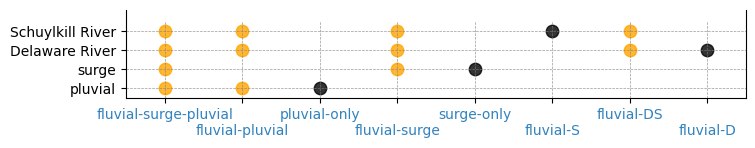

<Figure size 640x480 with 0 Axes>

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the driver components and their combinations as per the provided order
driver_components = ['Pluvial','Coastal', 'V3', 'V2']
driver_labels = ['pluvial','surge', 'Delaware River', 'Schuylkill River']
driver_labels2 = ['fluvial-surge-pluvial', 'fluvial-pluvial', 'pluvial-only',
                  'fluvial-surge','surge-only', 'fluvial-S', 'fluvial-DS', 'fluvial-D']

driver_combinations = {
    'All': ['Pluvial', 'Coastal', 'V3', 'V2'],  # 'All' includes everything except 'Others'    
    'V2+V3+Pluvial': ['V2', 'V3', 'Pluvial'],
    'Pluvial': ['Pluvial'],
    'V2+V3+Coastal': ['V2', 'V3', 'Coastal'],
    'Coastal': ['Coastal'],
    'V2': ['V2'],
    'V2+V3': ['V2', 'V3'],
    'V3': ['V3']
}

# Create a dataframe to hold the plot data
plot_data = pd.DataFrame(columns=driver_combinations.keys(), index=driver_components)

# Fill the dataframe with 0s and 1s where 1 indicates the presence of a component for a driver
for driver, components in driver_combinations.items():
    for component in driver_components:
        plot_data.loc[component,driver] = 1 if component in components else 0

# Plotting
fig, ax = plt.subplots(figsize=(8, 1))
color_single = 'black'
color_multiple = 'orange'
for i, driver in enumerate(plot_data.columns):
    num_components = plot_data[driver].sum()
    color = color_single if num_components == 1 else color_multiple
    for j, component in enumerate(plot_data.index):
        if plot_data.loc[component,driver] == 1:
            ax.scatter(driver, component, color=color,alpha=0.8, s=80)

# Set the y-ticks to match the driver components
ax.set_yticks(np.arange(len(driver_components)))
ax.set_xticks(np.arange(len(plot_data.columns)))
ax.set_yticklabels(driver_labels, fontsize=10)
#ax.set_xticklabels(driver_labels2, rotation=0,fontsize=10)


staggered_labels = [label if i % 2 == 0 else f"\n{label}" for i, label in enumerate(driver_labels2)]
ax.set_xticklabels(staggered_labels, rotation=0, fontsize=10, color='#3182bd')  
#ax.set_xticks([])

ax.spines['top'].set_visible(False)  # Turn off the top spine
ax.spines['left'].set_bounds(-0.5, len(driver_components)+0.1)  # Extend the y-axis spine downward
ax.spines['right'].set_bounds(-0.5, len(driver_components)+0.1)
#ax.spines['bottom'].set_color('#3182bd')  # Change X-axis color
#ax.spines['left'].set_color('#3182bd')   # Change Y-axis color
#ax.spines['right'].set_color('#3182bd')   # Change Y-axis color

# Title and labels
#plt.xlabel('Driver',fontsize=10)
#plt.grid(True, which='both', linestyle='--', linewidth=0.2, color='gray')
ax.xaxis.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha = 0.8)
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha = 0.8)
# Display the plot
ax.set_xlim([-0.5, len(plot_data.columns) - 0.5])  # Extend x limits
ax.set_ylim([-0.5, len(driver_components) - 0.5])  # Extend y limits
plt.show()
plt.tight_layout()
#fig.savefig(mainpath+'figure_draft\\driver_freq02.png',dpi=300,format='png',transparent='True', bbox_inches='tight')

In [82]:
ccc= sns.color_palette("Set3", 4)
print(ccc)

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451), (1.0, 1.0, 0.7019607843137254), (0.7450980392156863, 0.7294117647058823, 0.8549019607843137), (0.984313725490196, 0.5019607843137255, 0.4470588235294118)]


[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745), (0.8705882352941177, 0.5607843137254902, 0.0196078431372549), '#238b45', '#8c510a', '#6a51a3', '#73a2c6', '#98c4aa', '#c994c7', (0.5803921568627451, 0.5803921568627451, 0.5803921568627451), (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]


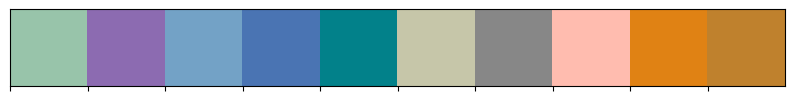

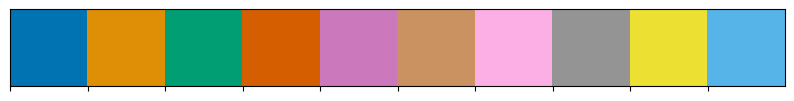

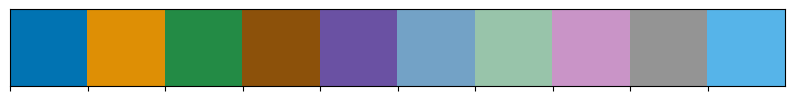

In [83]:
custom_colors = ['#98c4aa', '#8c6bb1', '#73a2c6', '#4a74b3', '#02818a','#c6c6a9', 
                 '#878787','#ffbcaf', '#e08214','#bf812d' ]
sns.palplot(custom_colors)
custom_colors = sns.color_palette("colorblind", 10)
sns.palplot(custom_colors)
custom_colors[2] = '#238b45'
custom_colors[3] = '#8c510a'
custom_colors[4] = '#6a51a3'
custom_colors[5] = '#73a2c6'
custom_colors[6] = '#98c4aa'
custom_colors[8] = custom_colors[7]
custom_colors[7] = '#c994c7'
sns.palplot(custom_colors)

print(custom_colors)

# Remove records from the data where the 'Driver' appears only once or not at all (to reduce the types of "Driver" to plot.

In [84]:
# Count how frequently each 'Driver' appears
driver_counts = top_events['Driver'].value_counts()
#drivers_to_remove = driver_counts[driver_counts <= 1].index

# Filter out these drivers from the dataset
#filtered_data = top_events[~top_events['Driver'].isin(drivers_to_remove)]
#top_events = filtered_data
#top_events.to_excel('C:\\Users\\sunn067\\Desktop\\top_67events.xlsx', index=False)

# Show which drivers are removed
#print("Drivers removed:", drivers_to_remove.tolist())
#print("Drivers included:", top_events['Driver'].unique())
#len(top_events)
print(driver_counts)


Driver
V2+V3+Coastal      17
V2+V3              13
Pluvial            10
V3                  7
V2+V3+Pluvial       6
Coastal             5
V2                  4
ALL                 3
V2+Coastal          2
V2+Pluvial          1
Coastal+Pluvial     1
V3+Coastal          1
Name: count, dtype: int64


In [85]:
print(custom_colors)

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745), (0.8705882352941177, 0.5607843137254902, 0.0196078431372549), '#238b45', '#8c510a', '#6a51a3', '#73a2c6', '#98c4aa', '#c994c7', (0.5803921568627451, 0.5803921568627451, 0.5803921568627451), (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]


65


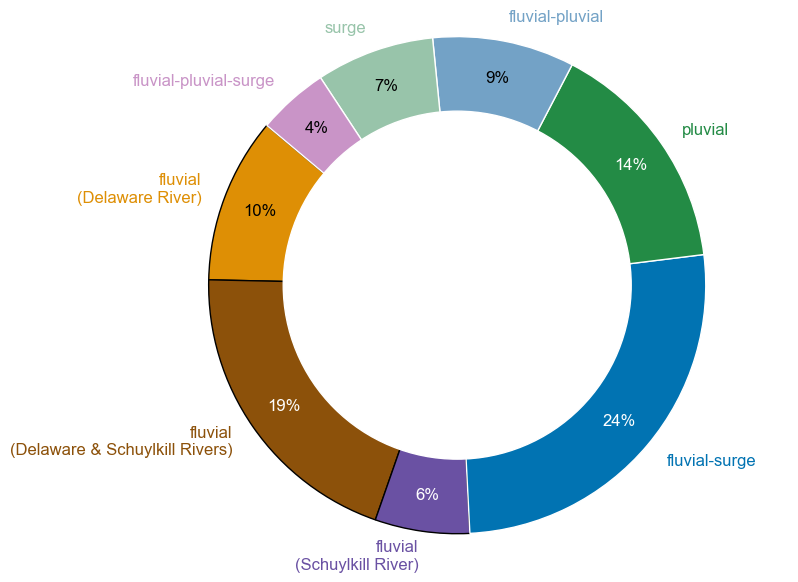

In [86]:
import matplotlib.patches as patches
# Define your custom order and labels
custom_order = ['V3','V2+V3','V2','V2+V3+Coastal','Pluvial','V2+V3+Pluvial','Coastal','ALL'] #,'Others']
labels2 = ['fluvial\n(Delaware River)','fluvial\n(Delaware & Schuylkill Rivers)','fluvial\n(Schuylkill River)','fluvial-surge','pluvial',
           'fluvial-pluvial','surge','fluvial-pluvial-surge'] #,'Others']
#custom_colors = sns.color_palette("deep", n_colors=len(autotexts))
custom_colors = [(0.8705882352941177, 0.5607843137254902, 0.0196078431372549),'#8c510a', '#6a51a3', 
                (0.00392156862745098, 0.45098039215686275, 0.6980392156862745), 
                 '#238b45', '#73a2c6', '#98c4aa', '#c994c7', 
                 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451), 
                 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

# Use Seaborn style
sns.set(style="whitegrid")

# Group by 'Driver' and count the occurrences, then reorder according to 'custom_order'
driver_counts = top_events['Driver'].value_counts().reindex(custom_order)
driver_counts = driver_counts.fillna(0.1)
print(sum(driver_counts))

# i want to calculate % relative to all major events rather than events caused by main drivers (contributing to >=3 events)
def custom_autopct(pct):
    return f'{round(pct * 65 / 70):.0f}%'
    
# Plotting the pie chart with Seaborn color palette and styled labels
plt.figure(figsize=(8, 6))  # Adjust the figure size as necessary
wedges, texts, autotexts = plt.pie(
    driver_counts, 
    labels=labels2, 
    autopct=custom_autopct, 
    startangle=140, 
    colors=custom_colors,  # Use Seaborn's bright color palette
    pctdistance=0.85,  # Percentage label distance from center
    labeldistance=1.1
)

# Set black edge color for fluvial ones
fluvial_indices = [0, 1, 2]  # Corresponds to 'V3', 'V2+V3', 'V2'
for i in fluvial_indices:
    wedges[i].set_edgecolor('black')
    wedges[i].set_linewidth(1)  # Adjust the width of the outline here

# Adjust text properties and colors
palette = sns.color_palette("bright", n_colors=len(autotexts))
for text, color in zip(texts, custom_colors):
    text.set_color(color)
    text.set_fontsize(12)
    
textcolor = ['black','white','white','white','white','black','black','black','black','black']    
for i, autotext in enumerate(autotexts):
    autotext.set_color(textcolor[i])

# Draw a circle at the center of the pie to create a donut shape
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  

# Tight layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()
#fig.savefig(mainpath+'figure_draft\\driver_freq03.png',dpi=300,format='png',transparent='True', bbox_inches='tight')

Driver
V3                7
V2+V3            13
V2                4
V2+V3+Coastal    17
Pluvial          10
V2+V3+Pluvial     6
Coastal           5
ALL               3
Name: count, dtype: int64


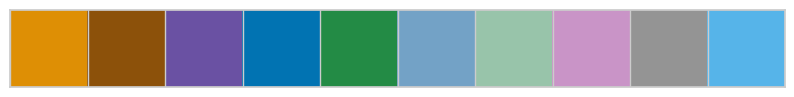

In [87]:
sns.palplot(custom_colors)
print(driver_counts)

Spring
Summer
Fall
Winter


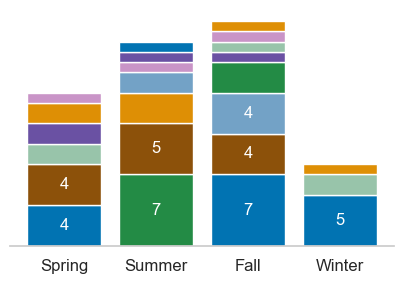

In [88]:
def convert_to_datetime(int_date):
    return pd.to_datetime(str(int_date), format='%Y%m%d%H')

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'  # DJF
    elif month in [3, 4, 5]:
        return 'Spring'  # MAM
    elif month in [6, 7, 8]:
        return 'Summer'  # JJA
    else:
        return 'Fall'    # SON
    
def plot_sorted_stacked_bars(df, color_map, new_driver_order, driver_labels2, seasons):
    # Iterate over each month, sort the drivers by count, and plot
    for season in seasons:
        if season in df.index:
            seasonal_data = df.loc[season]
            sorted_seasonal_data = seasonal_data.sort_values(ascending=False)
            cum_sum = sorted_seasonal_data.cumsum()
            total = cum_sum.iloc[-1]  # Use iloc to safely access the last element
            mask = cum_sum >= total * 1.0
            print(season)
            #print("total event count is: ", total)
            

            # Get the first index where the cumulative sum meets or exceeds the threshold
            first_over_threshold = cum_sum[mask].index[0]
            threshold_value = sorted_seasonal_data.loc[first_over_threshold]
            # Include all drivers up to and including the first that makes the sum go over 70%
            top_drivers = sorted_seasonal_data.loc[:first_over_threshold]
            additional_drivers = sorted_seasonal_data[sorted_seasonal_data == threshold_value].loc[first_over_threshold:]
            top_drivers = pd.concat([top_drivers, additional_drivers[1:]])

            
            bottom = 0
            for driver, value in top_drivers.items():
                if value>=4:
                    bars = ax.bar(season, value, width=0.8, bottom=bottom, color=color_map[driver])#,linewidth=1,edgecolor='k')
                    ax.text(bars[0].get_x() + bars[0].get_width()/2, bottom + value/2, str(value), 
                            ha='center', va='center',color='white')
                else:
                    bars = ax.bar(season, value, width=0.8, bottom=bottom, color=color_map[driver])
                bottom += value

            #ax.text(bars[0].get_x() + bars[0].get_width() / 2, bottom, f"Total: {total}", ha='center', va='bottom', color='black', fontsize=12)
            ax.tick_params(axis='x', labelsize=12)

    #ax.set_xlabel('Month', fontsize=12)
    #ax.set_ylabel('Frequency', fontsize=12)
    #ax.set_title('Monthly Frequency of Flood Events by Driver', fontsize=14)
    
    #ax.set_xticks(np.arange(1, 13))
    #ax.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'],fontsize=12)

    # Creating a custom legend manually because we reordered the data
    custom_handles = [plt.Rectangle((0, 0), 1, 1, color=color_map[driver]) for driver in new_driver_order if driver in df.columns]
    #ax.legend(custom_handles, driver_labels2, title='Driver', loc='upper right', bbox_to_anchor=(1.5, 1), fontsize=12)

# Assuming the 'Month' and 'Driver' columns and data preparation is already done
# identify the month of each flood event
top_events['t0'] = top_events['Begin'].apply(convert_to_datetime)
top_events['t1'] = top_events['End'].apply(convert_to_datetime)
top_events['Midpoint'] = top_events[['t0', 't1']].apply(lambda x: x['t0'] + (x['t1'] - x['t0']) / 2, axis=1)
top_events['Month'] = top_events['Midpoint'].dt.month
top_events['Season'] = top_events['Month'].apply(get_season)

events_per_season_driver = top_events.groupby(['Season', 'Driver']).size().unstack(fill_value=0)

# Set the color palette
DriverList = ['V3','V2+V3','V2','V2+V3+Coastal','Pluvial','V2+V3+Pluvial','Coastal','ALL'] 
color_map = {driver: color for driver, color in zip(DriverList, custom_colors)}
labels2 = ['F.Delaw','F.Delaw+\nF.Schuy','F.Schuy','F.Delaw+\nF.Schuy+\nSurge','Rain',
           'F.Delaw+\nF.Schuy+\nRain','Surge','All']
seasons = ['Spring', 'Summer', 'Fall', 'Winter']

# Sorting the events per month and driver data
sorted_events_per_season_driver = events_per_season_driver.apply(lambda x: x.sort_values(ascending=False), axis=1)
exclude_drivers = ['V3+Coastal', 'Coastal+Pluvial', 'V2+Pluvial', 'V2+Coastal']
filtered_df = sorted_events_per_season_driver.drop(columns=exclude_drivers)

# Call the plotting function with sorted data
fig, ax = plt.subplots(figsize=(4.2, 3))

plot_sorted_stacked_bars(filtered_df, color_map, DriverList, labels2, seasons)
plt.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks([])


#ax.yaxis.grid(True, linestyle='--', linewidth=0.2, color='gray', alpha = 0.5)

plt.tight_layout()
fig.savefig(mainpath+'figure_draft\\flood_season_distribution.png',dpi=300,format='png',transparent='True', bbox_inches='tight')
plt.show()


In [89]:
print(sorted_events_per_season_driver)
sorted_events_per_season_driver.to_csv('sorted_events_per_season_driver.csv')


Driver  ALL  Coastal  Coastal+Pluvial  Pluvial  V2  V2+Coastal  V2+Pluvial  \
Season                                                                       
Fall      1        1                1        3   1           2           0   
Spring    1        2                0        0   2           0           0   
Summer    1        0                0        7   1           0           1   
Winter    0        2                0        0   0           0           0   

Driver  V2+V3  V2+V3+Coastal  V2+V3+Pluvial  V3  V3+Coastal  
Season                                                       
Fall        4              7              4   1           0  
Spring      4              4              0   2           1  
Summer      5              1              2   3           0  
Winter      0              5              0   1           0  


C:\Users\sunn067\AppData\Local\Temp\ipykernel_19696\2700954155.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = top_events.groupby(['Inundation Level', 'Month']).size().unstack(fill_value=0)


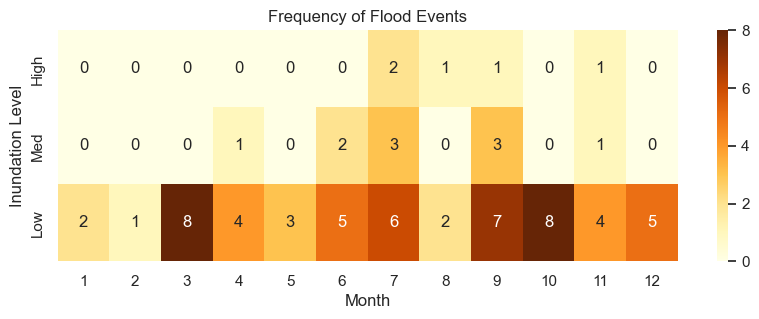

In [90]:
top_events['t0'] = top_events['Begin'].apply(convert_to_datetime)
top_events['t1'] = top_events['End'].apply(convert_to_datetime)
top_events['Midpoint'] = top_events[['t0', 't1']].apply(lambda x: x['t0'] + (x['t1'] - x['t0']) / 2, axis=1)
top_events['MidPoint'] = top_events['Begin'] + (top_events['End'] - top_events['Begin']) / 2
top_events['Month'] = top_events['Midpoint'].dt.month


# Function to categorize the inundation levels
def categorize_inundation(x):
    if x <= 5:
        return 'Low'
    elif x <= 10:
        return 'Med'
    elif x <= 16:
        return 'High'

# Apply the categorization function
top_events['Inundation Level'] = top_events['percent_inundation_015'].apply(categorize_inundation)
# Ensure the order of Inundation Level is maintained in the plots
top_events['Inundation Level'] = pd.Categorical(top_events['Inundation Level'], 
                                          categories=['High','Med','Low'], 
                                          ordered=True)

# Group the data by month and inundation level, and count the occurrences
heatmap_data = top_events.groupby(['Inundation Level', 'Month']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 3))
sns.heatmap(heatmap_data, annot=True, cmap=sns.color_palette("YlOrBr", as_cmap=True), fmt='d')
           #linewidths=0.5, linecolor='gray')
plt.title('Frequency of Flood Events')
plt.ylabel('Inundation Level')
plt.xlabel('Month')
plt.show()

In [91]:
print(driver_counts)
print(len(custom_colors))


Driver
V3                7
V2+V3            13
V2                4
V2+V3+Coastal    17
Pluvial          10
V2+V3+Pluvial     6
Coastal           5
ALL               3
Name: count, dtype: int64
10


C:\Users\sunn067\AppData\Local\Temp\ipykernel_19696\1440601172.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Driver_Combined'] = filtered_data['Driver'].apply(lambda x: 'V2+V3 Combined' if x in ['V3', 'V2+V3', 'V2'] else x)
C:\Users\sunn067\AppData\Local\Temp\ipykernel_19696\1440601172.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='Driver_Combined', y='percent_inundation_015', order=sorted_drivers,


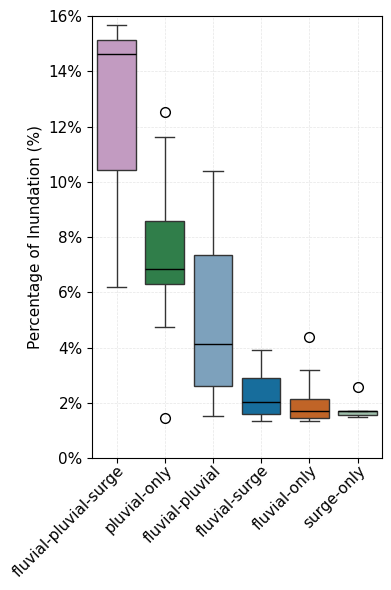

In [93]:
from matplotlib.ticker import PercentFormatter

drivers_to_drop = ['V3+Coastal', 'V2+Coastal', 'Coastal+Pluvial', 'V2+Pluvial']
filtered_data = top_events[~top_events['Driver'].isin(drivers_to_drop)]
filtered_data['Driver_Combined'] = filtered_data['Driver'].apply(lambda x: 'V2+V3 Combined' if x in ['V3', 'V2+V3', 'V2'] else x)


DriverList = ['V2+V3 Combined','V2+V3+Coastal','Pluvial','V2+V3+Pluvial','Coastal','ALL']
labels2 = ['fluvial-only','fluvial-surge','pluvial-only','fluvial-pluvial','surge-only','fluvial-pluvial-surge']
sorted_drivers = filtered_data.groupby('Driver_Combined')['percent_inundation_015'].median().sort_values(ascending=False).index

new_color_for_combined = '#d95f0e'  # Example new color
remaining_colors = custom_colors[3:]
color_map = {driver: color for driver, color in zip(DriverList, [new_color_for_combined] + remaining_colors)}

# Creating a sorted boxplot based on the median values
plt.style.use('default')
flierprops = dict(marker='o', markerfacecolor='none', markersize=7,
                  linestyle='none', markeredgecolor='black')

fig, ax = plt.subplots(figsize=(4, 6))
sns.boxplot(data=filtered_data, x='Driver_Combined', y='percent_inundation_015', order=sorted_drivers,
           palette=[color_map[driver] for driver in sorted_drivers], flierprops=flierprops,
           linewidth=1,  # Make the boundary line thinner
           medianprops=dict(color="black", linewidth=1))

# Apply custom labels to x-axis, sorted by  percent inundation
custom_label_order = {driver: label for driver, label in zip(DriverList, labels2)}
sorted_labels = [custom_label_order[driver] for driver in sorted_drivers if driver in custom_label_order]

#plt.title('Annual',fontsize=12)
ax.xaxis.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.2)
#plt.xlabel('Driver', fontsize=12)
plt.xlabel('')
plt.ylabel('Percentage of Inundation (%)', fontsize=11)
plt.xticks(ticks=range(len(sorted_labels)), labels=sorted_labels, 
           rotation=45, fontsize=10,ha='center', rotation_mode='anchor')  
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.gca().yaxis.set_major_formatter(PercentFormatter(100, decimals=0))
plt.ylim([0, 16])
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.2)
plt.setp(ax.get_xticklabels(), ha='right', rotation_mode='anchor', rotation=45)
ax.tick_params(axis='x', which='major', pad=0)
plt.tight_layout()
fig.savefig(mainpath+'figure_draft\\flood_magnitude_year.png',dpi=300,format='png',transparent='True', bbox_inches='tight')
plt.show()

In [70]:
means = filtered_data.groupby('Driver_Combined')['percent_inundation_015'].mean()
medians = filtered_data.groupby('Driver_Combined')['percent_inundation_015'].median()
print(medians)

grouped_data = filtered_data.groupby('Driver_Combined')['percent_inundation_015']

# Calculate the 25th and 75th percentiles
Q1 = grouped_data.quantile(0.25)
Q3 = grouped_data.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1
print(IQR)

Driver_Combined
ALL               14.623288
Coastal            1.691079
Pluvial            6.843662
V2+V3 Combined     1.697221
V2+V3+Coastal      2.012700
V2+V3+Pluvial      4.114364
Name: percent_inundation_015, dtype: float64
Driver_Combined
ALL               4.735201
Coastal           0.163731
Pluvial           2.296988
V2+V3 Combined    0.699430
V2+V3+Coastal     1.318808
V2+V3+Pluvial     4.729210
Name: percent_inundation_015, dtype: float64


C:\Users\sunn067\AppData\Local\Temp\ipykernel_19696\2467372598.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(data=filtered_data[top_events['Season'] == season], x='Driver_Combined', y='percent_inundation_015',
C:\Users\sunn067\AppData\Local\Temp\ipykernel_19696\2467372598.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data[top_events['Season'] == season], x='Driver_Combined', y='percent_inundation_015',
C:\Users\sunn067\AppData\Local\Temp\ipykernel_19696\2467372598.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(data=filtered_data[top_events['Season'] == season], x='Driver_Combined', y='percent_inundation_015',
C:\Users\sunn067\AppData\Local\Temp\ipykernel_19696\2467372598.py:7: FutureWarning: 

Passing `palette` without a

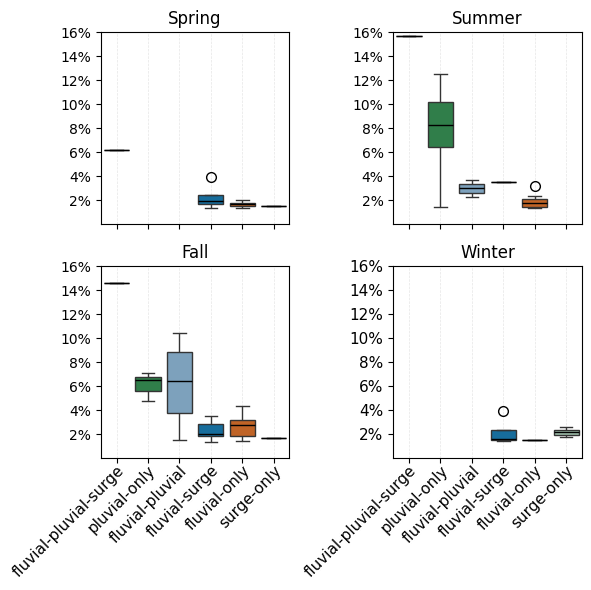

In [96]:
# Plotting each season in a separate subplot
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(6, 6), sharex=True, sharey=True)
axes = axes.flatten()
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
for idx, (ax, season) in enumerate(zip(axes, seasons)):
    sns.boxplot(data=filtered_data[top_events['Season'] == season], x='Driver_Combined', y='percent_inundation_015', 
                order=sorted_drivers, palette=[color_map[driver] for driver in sorted_drivers], 
                flierprops=flierprops, ax=ax,
                linewidth=1,  # Make the boundary line thinner
                medianprops=dict(color="black", linewidth=1))
    ax.set_title(f'{season}',fontsize=12)
    if idx==100 or idx==200:
        ax.set_ylabel('Percentage of Inundation (%)',fontsize=12)
    else:
        ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_yticks(ticks=range(2, 17, 2))
    plt.gca().yaxis.set_major_formatter(PercentFormatter(100, decimals=0))
    ax.set_ylim([0, 16])
    ax.xaxis.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.2)
    
    
for ax in axes[-2:]:  # Only the bottom two axes need x-axis labels
    ax.set_xticks(ticks=range(len(sorted_labels)))
    ax.set_xticklabels(labels=sorted_labels, rotation=45, fontsize=11, ha='center', rotation_mode='anchor')  
    plt.setp(ax.get_xticklabels(), ha='right', rotation_mode='anchor', rotation=45)
    ax.tick_params(axis='x', which='major', pad=0)
for ax in axes:
    ax.tick_params(axis='y', which='both', labelleft=True)
    

# Custom labels for x-axis
custom_label_order = {driver: label for driver, label in zip(DriverList, labels2)}
sorted_labels = [custom_label_order[driver] for driver in sorted_drivers if driver in custom_label_order]
plt.xticks(ticks=range(len(sorted_labels)), labels=sorted_labels, rotation=45, fontsize=11, ha='right')  
plt.yticks(fontsize=11)
plt.tight_layout()
fig.savefig(mainpath+'figure_draft\\flood_magnitude_season.png',dpi=300,format='png',transparent='True', bbox_inches='tight')
plt.show()

C:\Users\sunn067\AppData\Local\Temp\ipykernel_19696\984999146.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_events, x='Month', y='percent_inundation_015', palette="Set2",


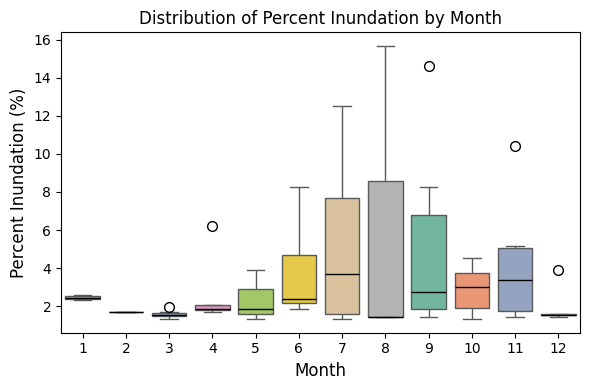

In [72]:
# Create a boxplot for the distribution of 'percent_inundation_015' for each month
plt.figure(figsize=(6, 4))
sns.boxplot(data=top_events, x='Month', y='percent_inundation_015', palette="Set2",
                flierprops=flierprops, 
                linewidth=1,  # Make the boundary line thinner
                medianprops=dict(color="black", linewidth=1))


plt.title('Distribution of Percent Inundation by Month')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Percent Inundation (%)', fontsize=12)
plt.xticks(rotation=0)  # No rotation needed for month labels
plt.tight_layout()
plt.show()

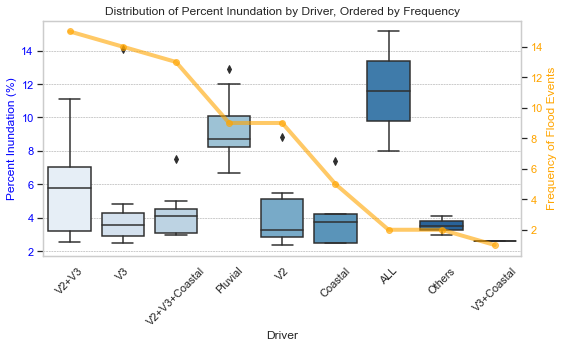

In [190]:
data = top_events

# Calculate the frequency of each 'Driver'
driver_counts = data['Driver'].value_counts()

# Create a sorted order based on the frequency of flood events
sorted_drivers_by_frequency = driver_counts.sort_values(ascending=False).index

# Create the plot
fig, ax1 = plt.subplots(figsize=(8, 5))

# Boxplot for percent inundation, ordered by event frequency
sns.boxplot(data=data, x='Driver', y='percent_inundation_015', ax=ax1, palette="Blues", order=sorted_drivers_by_frequency)
ax1.set_title('Distribution of Percent Inundation by Driver, Ordered by Frequency')
ax1.set_xlabel('Driver')
ax1.set_ylabel('Percent Inundation (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Create a secondary axis for the frequency
ax2 = ax1.twinx()

# Line plot for the frequency of flood events
ax2.plot(sorted_drivers_by_frequency, driver_counts[sorted_drivers_by_frequency], color='orange', 
         marker='o', linestyle='-', linewidth=4.0, alpha=0.6)
ax2.set_ylabel('Frequency of Flood Events', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Show grid
ax1.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.8)
plt.grid(False)
ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.8)

plt.tight_layout()
plt.show()



In [ ]:
top_events['t0'] = top_events['Begin'].apply(convert_to_datetime)
top_events['t1'] = top_events['End'].apply(convert_to_datetime)
top_events['Midpoint'] = top_events[['t0', 't1']].apply(lambda x: x['t0'] + (x['t1'] - x['t0']) / 2, axis=1)
top_events['MidPoint'] = top_events['Begin'] + (top_events['End'] - top_events['Begin']) / 2
top_events['Month'] = top_events['Midpoint'].dt.month

heatmap_data = top_events.pivot_table(index='Driver', columns='Month', values='percent_inundation_015', aggfunc='max')

# Plotting the heatmap with the total peak flood volume
plt.figure(figsize=(8, 6))
#sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='.1f', cbar_kws={'label': '% of inundation'})
sns.heatmap(heatmap_data, cmap=sns.color_palette("YlOrBr", as_cmap=True), annot=True,
            fmt='.1f', cbar_kws={'label': '% of inundation'})

plt.title('Heatmap of Total Peak Flood Volume 0.15 by Driver and Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Driver', fontsize=12)
plt.yticks(rotation=0)  # to keep the y-axis labels horizontal
plt.tight_layout()  # adjusts the plot to ensure everything fits without overlapping
plt.show()
